In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
plt.rc('font', family='NanumBarunGothic')
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' # for windows
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [3]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 16)
mpl.rc('xtick',labelsize = 12)
mpl.rc('ytick',labelsize = 12)

In [4]:
df_5 = pd.read_csv('C:/Users/yoon9/Desktop/3-2/데이터 시각화/도로교통공단_최근5년 교통사고 통계_20211231.csv',encoding = 'cp949')
df_local = pd.read_csv('C:/Users/yoon9/Desktop/3-2/데이터 시각화/도로교통공단_시도 시군구별 교통사고 통계_20211231.csv',encoding = 'cp949')
df_age = pd.read_csv('C:/Users/yoon9/Desktop/3-2/데이터 시각화/도로교통공단_가해운전자 연령층별 월별 교통사고 통계_20211231.csv',encoding = 'cp949')

## 그래프

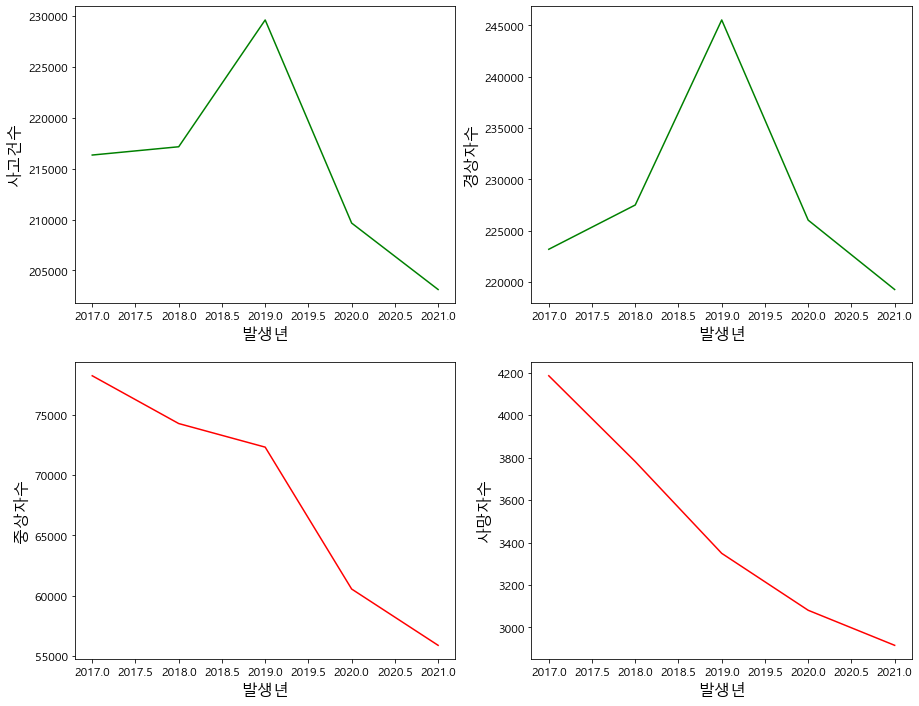

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,12))
palette = sns.color_palette('BuGn')
sns.lineplot(data = df_5, x = '발생년', y = '사고건수',ax=ax[0][0],color='green')
sns.lineplot(data = df_5, x = '발생년', y = '경상자수',ax=ax[0][1],color='green')
sns.lineplot(data = df_5, x = '발생년', y = '중상자수',ax=ax[1][0],color='Red')
sns.lineplot(data = df_5, x = '발생년', y = '사망자수',ax=ax[1][1],color='Red')
plt.show()

위 그래프는 최근 2017년부터 2021년까지 5년간 교통사고 건수 그래프 이다.

2017년부터 2021년까지 지난 5년간 교통사고 건수와 경상자 수를 보면 2019년까지 상승하였지만 코로나로 인해 다시 감소하는 것을 확인할 수 있다.

하지만 아래의 그래프를 보면 중상자수와 사망자수는 모두 감소하는 것을 확인할 수 있다.

이를 통해 중상자수와 사망자수는 전년대비 감소하였고 사고 건수와 경상자수는 코로나 사태와 함께 상승하다 하락한 것으로 볼 수 있다.


## 그래프

In [6]:
# BOX PLOT
df_local_group = df_local.groupby('시도').sum()
df_local_group.sort_values('사고건수',ascending = False)

,사고건수,사망자수,중상자수,경상자수,부상신고자수
시도,,,,,
경기,53332,537,12944,59912,5369
서울,33913,243,8162,33923,3138
대구,12133,84,2977,12899,1354
경북,12100,334,4273,12620,797
부산,11339,113,3528,10932,997
경남,11059,257,4634,9994,786
전남,8685,255,2467,10671,384
충남,8423,265,2911,8850,436
충북,7985,160,2677,9089,369


<AxesSubplot:xlabel='시도', ylabel='사고건수'>

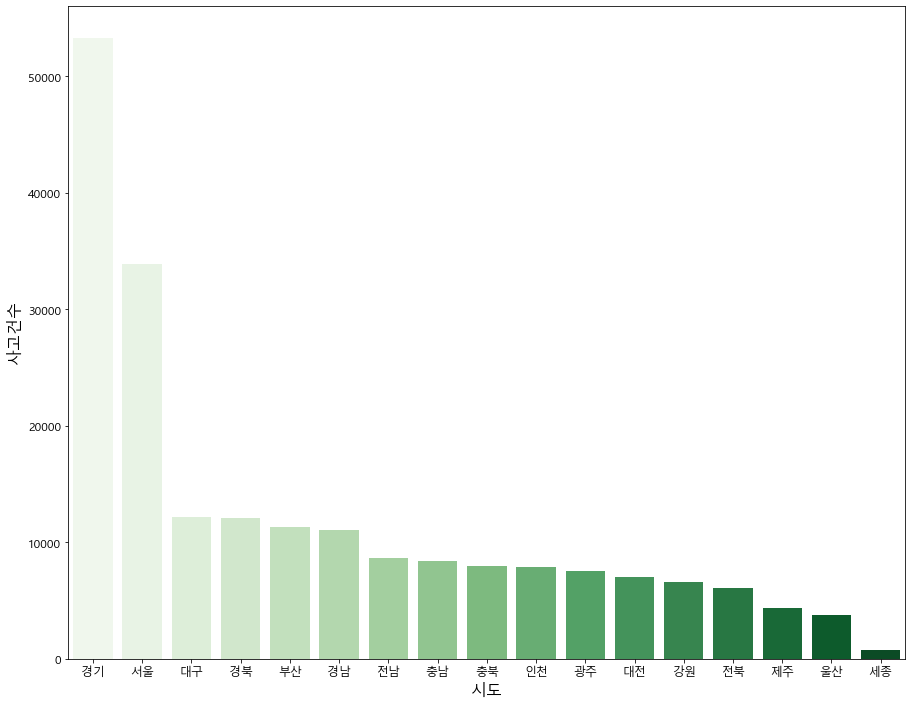

In [7]:
plt.figure(figsize=(15,12))
sns.barplot(x =df_local_group.sort_values('사고건수', ascending=False).index, y = df_local_group.sort_values('사고건수', ascending=False)['사고건수'], palette = 'Greens')

위 그래프는 21년 기준으로 각 도별 교통사고 수 그래프이다.

그래프를 보면 경기도에서 교통사고가 가장 많이 발생한 것을 확인할 수 있다.

그 뒤로 서울과 대구, 경북 순으로 교통사고가 많이 발생한 것을 알 수 있다.

대구, 부산의 경우 다른 부산, 경남, 전남등과 같은 큰 지역과 비교했을 때

더 많은 교통사고가 발생한 것을 확인할 수 있다.

---

## 그래프

In [8]:
# 연령별 히트맵

df_age_group = df_age.groupby('가해자연령층').sum()
df_age_group

,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
가해자연령층,,,,,,
20세이하,78,6960,85,1903,6848,1075
21-30세,78,29076,360,7747,32460,2682
31-40세,78,30304,350,8139,33624,2513
41-50세,78,36480,494,10104,39777,2711
51-60세,78,46938,639,13141,50867,3260
61-64세,78,18578,278,5251,20344,1181
65세이상,78,31841,709,9254,33184,2275
불명,78,2953,1,366,2179,723


In [9]:
df_age_group.iloc[7] = df_age_group.iloc[5] + df_age_group.iloc[6]

In [10]:
df_age_group = df_age_group.reset_index()

In [11]:
df_age_group['가해자연령층'][7] = '60세이상'

<ipython-input-11-1896a1f4e4cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_group['가해자연령층'][7] = '60세이상'


In [12]:
df_age_group = df_age_group.drop(index = [5,6],columns = '발생월')

<AxesSubplot:ylabel='가해자연령층'>

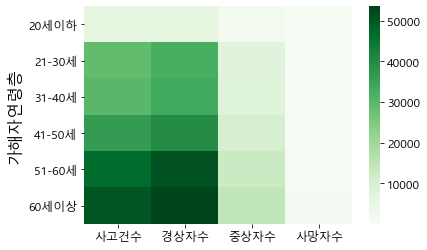

In [13]:
sns.heatmap(data = df_age_group.set_index('가해자연령층')[['사고건수','경상자수','중상자수','사망자수']], cmap='Greens')

위는 21년도 교통사고 발생시 가해자 연령층에 대한 히트맵이다.

20세 이하의 경우 사고가 가장 발생하지 않았고

이후 21~30세 부터 60세 이상이 될 때까지 연령층이 높아질수록 사고가 많이 일어나는 것을 볼 수 있다.

---

## 그래프

In [14]:
# scatter plot
df_health = pd.read_csv('C:/Users/yoon9/Desktop/데이터 박스/국민 체력/KS_NFA_FTNESS_MESURE_ITEM_MESURE_INFO_202106.csv')
df_health

,TEST_CNT,CENTER_NM,AGE_GBN,TEST_GBN,TEST_AGE,INPUT_GBN,CERT_GBN,TEST_YMD,TEST_SEX,ITEM_F001,...,ITEM_F032,ITEM_F033,ITEM_F034,ITEM_F035,ITEM_F036,ITEM_F037,ITEM_F038,ITEM_F039,ITEM_F040,ITEM_F041
0,1,세종,성인,출장,43,관리자,1등급,20210624,F,162.7,...,NaN,NaN,NaN,NaN,68.0,40.0,NaN,NaN,0.372,0.539
1,1,KSPO대구(출장B),성인,출장,56,관리자,참가증,20210615,M,168.6,...,NaN,NaN,NaN,NaN,90.0,41.8,NaN,NaN,0.423,NaN
2,1,KSPO광주,성인,일반,19,관리자,참가증,20210615,F,162.6,...,NaN,NaN,NaN,NaN,151.0,32.8,NaN,NaN,0.375,NaN
3,2,KSPO아산(출장),성인,출장,37,관리자,참가증,20210615,M,179.3,...,NaN,NaN,NaN,NaN,116.0,39.6,NaN,NaN,0.359,NaN
4,1,사하,성인,출장,56,관리자,참가증,20210624,M,174.5,...,NaN,NaN,NaN,NaN,109.0,37.5,NaN,NaN,0.346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18018,1,영암,청소년,출장,18,관리자,3등급,20210609,M,172.6,...,NaN,NaN,NaN,NaN,133.0,46.9,NaN,NaN,NaN,NaN
18019,1,영암,청소년,출장,18,관리자,참가증,20210609,M,175.6,...,NaN,NaN,NaN,NaN,130.0,46.8,NaN,NaN,NaN,NaN
18020,1,영동,청소년,출장,17,관리자,참가증,20210614,M,166.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18021,2,영동,청소년,출장,18,관리자,참가증,20210614,F,156.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test1 = df_health[df_health['ITEM_F012'] < 50]
test2 = df_health[df_health['ITEM_F002'] < 100]

Text(0, 0.5, '윗몸앞으로굽히기(cm)')

C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yoon9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


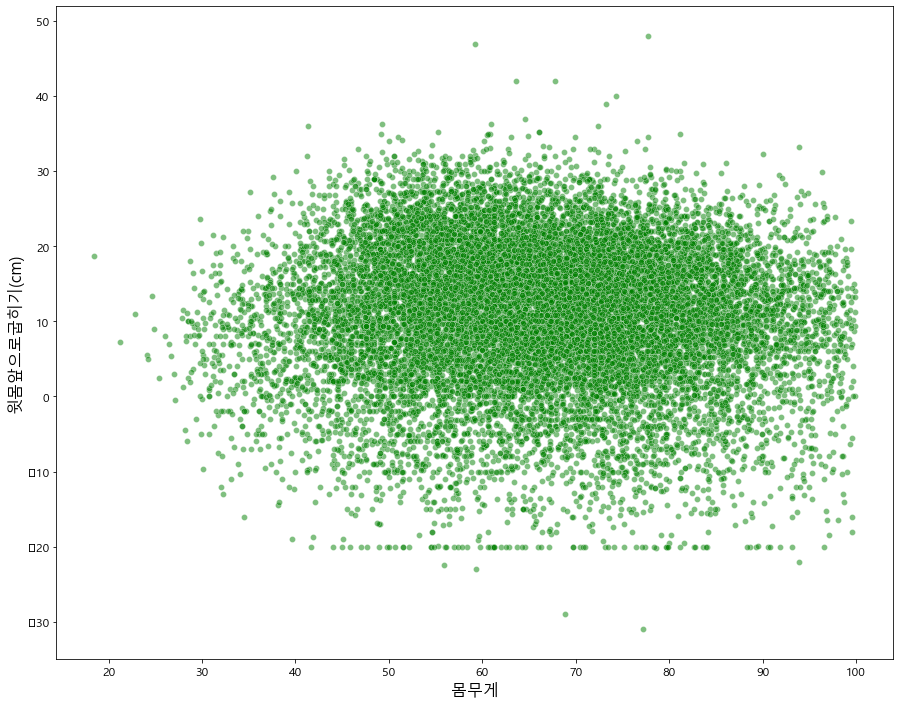

In [23]:
plt.figure(figsize=(15,12))
sns.scatterplot(data = df_health, x = test2['ITEM_F002'], y = test1['ITEM_F012'], alpha = 0.5,color = 'green')
plt.xlabel('몸무게')
plt.ylabel('윗몸앞으로굽히기(cm)')

국민 체력 평가 데이터에서 몸무게와 윗몸앞으로굽히기를 scatter plot 을 이용하여 그린 그래프이다.


여기서 분포를 보았을 때 전반적으로 일직선의 분포를 띄고 있는 것을 볼 수 있다.


이를 통해 몸무게와 윗몸앞으로굽히기 거리의 상관관계를 유추해보았을 때 둘은 상관관계가 적다고 볼 수 있다.

## 그래프 5

In [18]:
test = df_health[df_health['TEST_AGE'] > 15]

In [19]:
df_health15_25 = test[test['TEST_AGE'] < 25]

Text(0, 0.5, '몸무게')

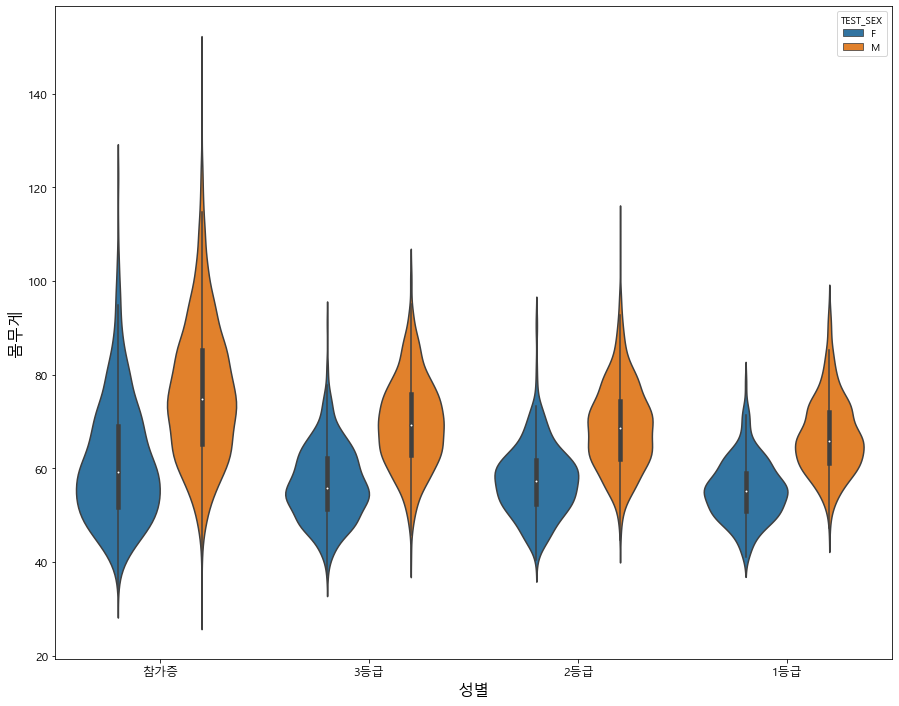

In [20]:
2
plt.figure(figsize=(15,12))
sns.violinplot(x = df_health15_25['CERT_GBN'],y = df_health15_25['ITEM_F002'],hue = df_health15_25['TEST_SEX'], order=['참가증', '3등급', '2등급', '1등급'])
plt.xlabel('성별')
plt.ylabel('몸무게')

이는 국민체력검정 데이터에서 15 ~ 25세 남여의 몸무게에 따른 체력 등급을 나타낸 그래프이다.

그래프를 통해 각 등급별 몸무게의 분포를 확인할 수 있다.

참가증에서 1등급으로 갈 수록 여성의 몸무게는 비슷하고 남성의 몸무게는 감소하는 것을 확인할 수 있다.

또 분포 역시 남여 모두 1등급으로 갈수록 분포가 좁아지는 것을 확인할 수 있다.